x_data.shape: (118, 2)
y_data.shape: (118,)


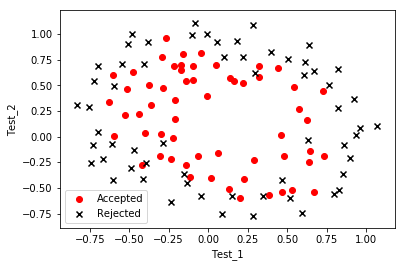

In [329]:
import numpy as np
import scipy.optimize as op
from matplotlib import pyplot as plt

data = np.loadtxt('..\data_sets\ex2data2.txt', delimiter = ',')
x_data = data[:, 0:2]
y_data = data[:, 2]
print('x_data.shape:', x_data.shape)
print('y_data.shape:', y_data.shape)

def plotdata(data):
    positive = data[data[:, 2] == 1]
    negative = data[data[:, 2] == 0]
    plt.xlabel('Test_1')
    plt.ylabel('Test_2')
    plt.scatter(positive[:, 0], positive[:, 1], c = 'r', marker = 'o', label = 'Accepted')
    plt.scatter(negative[:, 0], negative[:, 1], c = 'black', marker = 'x', label = 'Rejected')
    plt.legend(loc = 3)
    
plt.figure(0)    
plotdata(data)

In [330]:
# Feature mapping
def feature_map(x1, x2, power):
    x0 = np.ones(x1.size)
    result = x0
    for i in range(1, power + 1):
        for j in range(i + 1):
            x_ = x1**(i-j)*x2**j
#     for i in range(power + 1):
#         for j in range(power + 1 - i):
#             if i == 0 and j == 0:
#                 continue
#             x_ = x1**i*x2**j
            result = np.column_stack((result, x_))
    return result

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, x, y, L = 0):
    m = y.size
    theta_ = theta[1:]
    return (-1 / m) * (y @ np.log(sigmoid(x @ theta)) + (1 - y) @ np.log(1 - sigmoid(x @ theta))) + L / (2*m) * np.sum(theta_**2)

def gradient(theta, x, y, L = 0):
    m = y.size
    theta_ = (L / m) * theta 
    theta_[0] = 0
    return (1 / m) * ((sigmoid(x @ theta) - y) @ x) + theta_

def plot_boundary(theta):
    u = np.linspace(-1, 1.2, 50)
    v = np.linspace(-1, 1.2, 50)
    z = np.zeros((u.size, v.size)) #  it can also use z = np.meshgrid(u, v)
    for i in range(u.size):
        for j in range(v.size):
            x_ = feature_map(u[i], v[j], 6)
            z[i][j] = x_ @ theta
    C = plt.contour(u, v, z, 0, colors = 'b')
    plt.clabel(C,inline=True,fontsize=15)

x_data.shape: (118, 28)
y_data.shape: (118,)
theta.shape: (28,)
Optimization terminated successfully.
         Current function value: 0.266508
         Iterations: 2386
         Function evaluations: 8863
         Gradient evaluations: 8863
Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 19
         Function evaluations: 55
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11


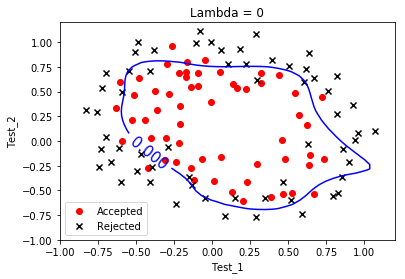

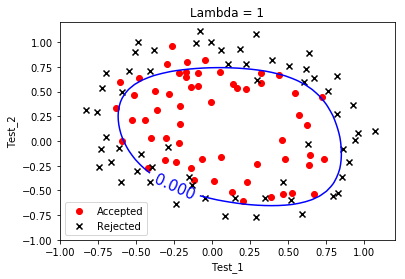

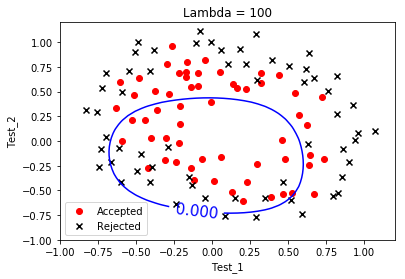

In [331]:
# build the model
x_data = feature_map(x_data[:, 0], x_data[:, 1], 6)
print('x_data.shape:', x_data.shape)
print('y_data.shape:', y_data.shape)
theta = np.zeros(x_data[0].size)
print('theta.shape:', theta.shape)

# plot decision boundary
lambda_ = 0
result_CG = op.minimize(fun = cost_function, x0 = theta, args = (x_data, y_data, lambda_), method = 'CG', jac = gradient, options={"disp":True})
plt.figure(1)
plotdata(data)
plot_boundary(result_CG['x'])
plt.title('Lambda = 0')

lambda_ = 1
result_CG = op.minimize(fun = cost_function, x0 = theta, args = (x_data, y_data, lambda_), method = 'CG', jac = gradient, options={"maxiter":500, "disp":True})
plt.figure(2)
plotdata(data)
plot_boundary(result_CG['x'])
plt.title('Lambda = 1')

lambda_ = 100
result_CG = op.minimize(fun = cost_function, x0 = theta, args = (x_data, y_data, lambda_), method = 'CG', jac = gradient, options={"maxiter":500, "disp":True})
plt.figure(3)
plotdata(data)
plot_boundary(result_CG['x'])
plt.title('Lambda = 100')

plt.show()